In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scipy.stats as stats
import statsmodels.formula.api as sm
%matplotlib inline
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('G:/Chandra Mouli Sir/Class_3/3. Peer Group Lending - Predicting Intrest Rates/LoansData.csv')

In [3]:
data.head()

,LoanID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,1,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,2,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,3,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,4,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,5,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [4]:
s = []
for i in data.columns:
    x = i.replace('.','_')
    s.append(x)

In [5]:
data.columns = s

In [6]:
s

['LoanID',
 'Amount_Requested',
 'Amount_Funded_By_Investors',
 'Interest_Rate',
 'Loan_Length',
 'Loan_Purpose',
 'Debt_To_Income_Ratio',
 'State',
 'Home_Ownership',
 'Monthly_Income',
 'FICO_Range',
 'Open_CREDIT_Lines',
 'Revolving_CREDIT_Balance',
 'Inquiries_in_the_Last_6_Months',
 'Employment_Length']

In [7]:
data['Interest_Rate'] = data['Interest_Rate'].replace('%','',regex = True).astype(float)
data['Debt_To_Income_Ratio'] = data['Debt_To_Income_Ratio'].replace('%','',regex = True).astype(float)
data['Loan_Length'] = data['Loan_Length'].replace('months','',regex = True).astype(float)

In [8]:
a = data.FICO_Range.str.split('-',expand = True)[0].astype(float)
b = data.FICO_Range.str.split('-',expand = True)[1].astype(float)

In [9]:
data['ficoavg'] = (a+b)/2

In [10]:
data.drop(['LoanID','Amount_Funded_By_Investors','State','FICO_Range'], axis = 1, inplace = True)

In [11]:
data['Employment_Length'] = data['Employment_Length'].str.replace('<','',regex = True)
data['Employment_Length'] = data['Employment_Length'].str.replace('+','',regex = True)
data['Employment_Length'] = data['Employment_Length'].str.replace('years','',regex = True)
data['Employment_Length'] = data['Employment_Length'].str.replace('year','',regex = True)

In [12]:
data['Employment_Length'] = data['Employment_Length'].astype(float)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 12 columns):
Amount_Requested                  2499 non-null float64
Interest_Rate                     2498 non-null float64
Loan_Length                       2500 non-null float64
Loan_Purpose                      2500 non-null object
Debt_To_Income_Ratio              2499 non-null float64
Home_Ownership                    2499 non-null object
Monthly_Income                    2499 non-null float64
Open_CREDIT_Lines                 2497 non-null float64
Revolving_CREDIT_Balance          2497 non-null float64
Inquiries_in_the_Last_6_Months    2497 non-null float64
Employment_Length                 2423 non-null float64
ficoavg                           2498 non-null float64
dtypes: float64(10), object(2)
memory usage: 234.5+ KB


In [14]:
data.head()

,Amount_Requested,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,ficoavg
0,20000.0,8.90,36.0,debt_consolidation,14.90,MORTGAGE,6541.67,14.0,14272.0,2.0,1.0,737.0
1,19200.0,12.12,36.0,debt_consolidation,28.36,MORTGAGE,4583.33,12.0,11140.0,1.0,2.0,717.0
2,35000.0,21.98,60.0,debt_consolidation,23.81,MORTGAGE,11500.00,14.0,21977.0,1.0,2.0,692.0
3,10000.0,9.99,36.0,debt_consolidation,14.30,MORTGAGE,3833.33,10.0,9346.0,0.0,5.0,697.0
4,12000.0,11.71,36.0,credit_card,18.78,RENT,3195.00,11.0,14469.0,0.0,9.0,697.0


In [15]:
dummy_var = pd.get_dummies(data[['Loan_Purpose','Home_Ownership']],drop_first = True)

In [16]:
data_new = pd.concat([data,dummy_var], axis=1)

In [17]:
data_new.head()

,Amount_Requested,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,...,Loan_Purpose_moving,Loan_Purpose_other,Loan_Purpose_renewable_energy,Loan_Purpose_small_business,Loan_Purpose_vacation,Loan_Purpose_wedding,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT
0,20000.0,8.90,36.0,debt_consolidation,14.90,MORTGAGE,6541.67,14.0,14272.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,19200.0,12.12,36.0,debt_consolidation,28.36,MORTGAGE,4583.33,12.0,11140.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,35000.0,21.98,60.0,debt_consolidation,23.81,MORTGAGE,11500.00,14.0,21977.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,10000.0,9.99,36.0,debt_consolidation,14.30,MORTGAGE,3833.33,10.0,9346.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,12000.0,11.71,36.0,credit_card,18.78,RENT,3195.00,11.0,14469.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
data_new.drop(['Loan_Purpose', 'Home_Ownership'], axis=1, inplace=True)

In [19]:
def outliers_treat(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

In [20]:
data_new = data_new.apply(outliers_treat)

C:\Users\NitinBabu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  
C:\Users\NitinBabu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
data_new.apply(lambda x: sum(x.isnull()))

Amount_Requested                    1
Interest_Rate                       2
Loan_Length                         0
Debt_To_Income_Ratio                1
Monthly_Income                      1
Open_CREDIT_Lines                   3
Revolving_CREDIT_Balance            3
Inquiries_in_the_Last_6_Months      3
Employment_Length                  77
ficoavg                             2
Loan_Purpose_credit_card            0
Loan_Purpose_debt_consolidation     0
Loan_Purpose_educational            0
Loan_Purpose_home_improvement       0
Loan_Purpose_house                  0
Loan_Purpose_major_purchase         0
Loan_Purpose_medical                0
Loan_Purpose_moving                 0
Loan_Purpose_other                  0
Loan_Purpose_renewable_energy       0
Loan_Purpose_small_business         0
Loan_Purpose_vacation               0
Loan_Purpose_wedding                0
Home_Ownership_NONE                 0
Home_Ownership_OTHER                0
Home_Ownership_OWN                  0
Home_Ownersh

In [22]:
# based on missing values(77 out of 250) in employment length column we can drop that column
data_new.drop(['Employment_Length'], axis = 1, inplace = True) 

In [23]:
data_new.apply(lambda x: sum(x.isnull()))

Amount_Requested                   1
Interest_Rate                      2
Loan_Length                        0
Debt_To_Income_Ratio               1
Monthly_Income                     1
Open_CREDIT_Lines                  3
Revolving_CREDIT_Balance           3
Inquiries_in_the_Last_6_Months     3
ficoavg                            2
Loan_Purpose_credit_card           0
Loan_Purpose_debt_consolidation    0
Loan_Purpose_educational           0
Loan_Purpose_home_improvement      0
Loan_Purpose_house                 0
Loan_Purpose_major_purchase        0
Loan_Purpose_medical               0
Loan_Purpose_moving                0
Loan_Purpose_other                 0
Loan_Purpose_renewable_energy      0
Loan_Purpose_small_business        0
Loan_Purpose_vacation              0
Loan_Purpose_wedding               0
Home_Ownership_NONE                0
Home_Ownership_OTHER               0
Home_Ownership_OWN                 0
Home_Ownership_RENT                0
dtype: int64

In [24]:
def missing_treat(x):
    x = x.fillna(x.median())
    return x

In [25]:
data_new = data_new.apply(missing_treat)

In [26]:
data_new.apply(lambda x: sum(x.isnull()))

Amount_Requested                   0
Interest_Rate                      0
Loan_Length                        0
Debt_To_Income_Ratio               0
Monthly_Income                     0
Open_CREDIT_Lines                  0
Revolving_CREDIT_Balance           0
Inquiries_in_the_Last_6_Months     0
ficoavg                            0
Loan_Purpose_credit_card           0
Loan_Purpose_debt_consolidation    0
Loan_Purpose_educational           0
Loan_Purpose_home_improvement      0
Loan_Purpose_house                 0
Loan_Purpose_major_purchase        0
Loan_Purpose_medical               0
Loan_Purpose_moving                0
Loan_Purpose_other                 0
Loan_Purpose_renewable_energy      0
Loan_Purpose_small_business        0
Loan_Purpose_vacation              0
Loan_Purpose_wedding               0
Home_Ownership_NONE                0
Home_Ownership_OTHER               0
Home_Ownership_OWN                 0
Home_Ownership_RENT                0
dtype: int64

In [27]:
data_new.describe()

,Amount_Requested,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,ficoavg,Loan_Purpose_credit_card,...,Loan_Purpose_moving,Loan_Purpose_other,Loan_Purpose_renewable_energy,Loan_Purpose_small_business,Loan_Purpose_vacation,Loan_Purpose_wedding,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,...,2500.000000,2500.000000,2500.0,2500.00000,2500.0,2500.000000,2500.0,2500.0,2500.000000,2500.000000
mean,12408.110000,13.060383,41.260800,15.378504,5608.30546,10.052800,14764.598800,0.88640,707.914000,0.177600,...,0.011600,0.080400,0.0,0.03480,0.0,0.015600,0.0,0.0,0.080000,0.458400
std,7796.368598,4.147574,9.930893,7.478992,3083.77547,4.377405,14758.856976,1.14176,34.751369,0.382252,...,0.107098,0.271966,0.0,0.18331,0.0,0.123947,0.0,0.0,0.271347,0.498366
min,1500.000000,5.984000,36.000000,0.718000,1416.40320,3.000000,0.000000,0.00000,662.000000,0.000000,...,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000
25%,6000.000000,10.160000,36.000000,9.750000,3500.00000,7.000000,5589.250000,0.00000,682.000000,0.000000,...,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000
50%,10000.000000,13.110000,36.000000,15.320000,5000.00000,9.000000,10948.000000,0.00000,702.000000,0.000000,...,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000
75%,17000.000000,15.800000,36.000000,20.672500,6800.00000,13.000000,18843.750000,1.00000,727.000000,0.000000,...,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,1.000000
max,35000.000000,22.959900,60.000000,33.230000,18750.00000,23.000000,92433.640000,5.00000,807.000000,1.000000,...,1.000000,1.000000,0.0,1.00000,0.0,1.000000,0.0,0.0,1.000000,1.000000


In [28]:
data_new.drop(['Home_Ownership_OTHER','Home_Ownership_NONE','Loan_Purpose_vacation','Loan_Purpose_renewable_energy','Loan_Purpose_house'],axis = 1, inplace = True)

In [29]:
data_new.drop(['Loan_Purpose_educational'],axis =1, inplace = True)

In [30]:
data_new.describe()

,Amount_Requested,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,ficoavg,Loan_Purpose_credit_card,Loan_Purpose_debt_consolidation,Loan_Purpose_home_improvement,Loan_Purpose_major_purchase,Loan_Purpose_medical,Loan_Purpose_moving,Loan_Purpose_other,Loan_Purpose_small_business,Loan_Purpose_wedding,Home_Ownership_OWN,Home_Ownership_RENT
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000
mean,12408.110000,13.060383,41.260800,15.378504,5608.30546,10.052800,14764.598800,0.88640,707.914000,0.177600,0.52280,0.060800,0.040400,0.012000,0.011600,0.080400,0.03480,0.015600,0.080000,0.458400
std,7796.368598,4.147574,9.930893,7.478992,3083.77547,4.377405,14758.856976,1.14176,34.751369,0.382252,0.49958,0.239011,0.196935,0.108907,0.107098,0.271966,0.18331,0.123947,0.271347,0.498366
min,1500.000000,5.984000,36.000000,0.718000,1416.40320,3.000000,0.000000,0.00000,662.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,6000.000000,10.160000,36.000000,9.750000,3500.00000,7.000000,5589.250000,0.00000,682.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,10000.000000,13.110000,36.000000,15.320000,5000.00000,9.000000,10948.000000,0.00000,702.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,17000.000000,15.800000,36.000000,20.672500,6800.00000,13.000000,18843.750000,1.00000,727.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
max,35000.000000,22.959900,60.000000,33.230000,18750.00000,23.000000,92433.640000,5.00000,807.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


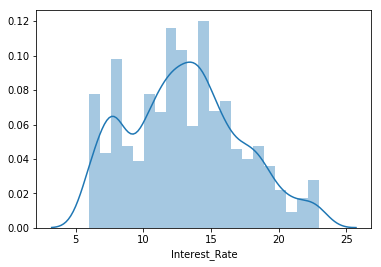

In [31]:
import seaborn as sns
sns.distplot(data_new.Interest_Rate)

In [32]:
coor_op = data_new.corr()

In [33]:
#Based on correlation metrics and correlation between Y & X, the below variables can be considered
#feature is a dataframe
features = data_new[['Amount_Requested', 'Loan_Length', 'Debt_To_Income_Ratio', 'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months', 'ficoavg', 'Loan_Purpose_debt_consolidation', 'Loan_Purpose_home_improvement', 'Loan_Purpose_major_purchase']]

In [34]:
# target is also a dataframe
target = data_new[['Interest_Rate']]

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
features.columns

Index(['Amount_Requested', 'Loan_Length', 'Debt_To_Income_Ratio',
       'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance',
       'Inquiries_in_the_Last_6_Months', 'ficoavg',
       'Loan_Purpose_debt_consolidation', 'Loan_Purpose_home_improvement',
       'Loan_Purpose_major_purchase'],
      dtype='object')

In [37]:
# Based on VIF(Multicollinearity check) we can drop Amount_Requested variable but not Loan_length and ficoavg because they have more correlation values with interest rate
features.drop(['Amount_Requested'], axis = 1, inplace = True)

C:\Users\NitinBabu\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [38]:
print(features.shape[0])               # number of rows
print(features.shape[1])               # number of columns

2500
9


In [39]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif["features"] = features.columns

In [40]:
vif.iloc[4]

VIF Factor                           1.62613
features      Inquiries_in_the_Last_6_Months
Name: 4, dtype: object

In [41]:
vif

,VIF Factor,features
0,18.081959,Loan_Length
1,6.136031,Debt_To_Income_Ratio
2,7.883170,Open_CREDIT_Lines
3,2.272869,Revolving_CREDIT_Balance
4,1.626130,Inquiries_in_the_Last_6_Months
5,23.302999,ficoavg
6,2.415570,Loan_Purpose_debt_consolidation
7,1.183713,Loan_Purpose_home_improvement
8,1.126159,Loan_Purpose_major_purchase


In [42]:
data_final = pd.concat([features,target], axis = 1)

In [43]:
target.shape

(2500, 1)

In [44]:
train,test = train_test_split(data_final, test_size = 0.3, random_state = 21)

In [45]:
formula = 'Interest_Rate ~' + '+'.join(features.columns)

In [46]:
formula

'Interest_Rate ~Loan_Length+Debt_To_Income_Ratio+Open_CREDIT_Lines+Revolving_CREDIT_Balance+Inquiries_in_the_Last_6_Months+ficoavg+Loan_Purpose_debt_consolidation+Loan_Purpose_home_improvement+Loan_Purpose_major_purchase'

In [47]:
lm_model = sm.ols('Interest_Rate ~Loan_Length+Open_CREDIT_Lines+Revolving_CREDIT_Balance+Inquiries_in_the_Last_6_Months+ficoavg+Loan_Purpose_debt_consolidation', data = train )

In [48]:
lm_model = lm_model.fit()

In [49]:
print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Interest_Rate   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     697.1
Date:                Thu, 11 Jul 2019   Prob (F-statistic):               0.00
Time:                        21:19:12   Log-Likelihood:                -3893.5
No. Observations:                1750   AIC:                             7801.
Df Residuals:                    1743   BIC:                             7839.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [50]:
#Final equation
#Interest_Rate = 1.503e-05 * Revolving_CREDIT_Balance  + Inquiries_in_the_Last_6_Months*0.4007--0.0850*Fico_avg+0.6030*Loan_Purpose_debt_consolidation+70.0170

In [51]:
train['Pred'] = lm_model.predict(train)

C:\Users\NitinBabu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
test['Pred'] = lm_model.predict(test)

C:\Users\NitinBabu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [53]:
train.head()

,Loan_Length,Debt_To_Income_Ratio,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,ficoavg,Loan_Purpose_debt_consolidation,Loan_Purpose_home_improvement,Loan_Purpose_major_purchase,Interest_Rate,Pred
426,36.0,16.75,9.0,4500.0,0.0,672.0,0,0,0,13.11,14.585116
1453,60.0,18.78,6.0,18049.0,0.0,667.0,1,0,0,20.25,19.822933
816,36.0,17.19,8.0,10820.0,0.0,692.0,1,0,0,13.67,13.234357
1057,36.0,13.98,8.0,6639.0,4.0,732.0,1,0,0,10.25,11.392317
956,36.0,13.94,5.0,1364.0,2.0,692.0,0,0,1,10.36,13.805785


In [54]:
#Metrics for train
train_MAPE =np.mean(np.abs(train.Interest_Rate - train.Pred)/train.Interest_Rate)
train_RMSE =np.mean(np.square(train.Interest_Rate - train.Pred))
train_RMSPE =np.mean(np.square((train.Interest_Rate - train.Pred)/train.Interest_Rate))
train_corr = np.corrcoef(train.Interest_Rate, train.Pred)[1][0]
print(train_MAPE)
print(train_RMSE)
print(train_RMSPE)
print(train_corr)

0.15063645736082226
5.011849048522964
0.041151758214093656
0.8401467230051862


In [55]:
#Metrics for test
test_MAPE =np.mean(np.abs(test.Interest_Rate - test.Pred)/test.Interest_Rate)
test_RMSE =np.mean(np.square(test.Interest_Rate - test.Pred))
test_RMSPE =np.mean(np.square((test.Interest_Rate - test.Pred)/test.Interest_Rate))
test_corr = np.corrcoef(test.Interest_Rate, test.Pred)[1][0]
print(test_MAPE)
print(test_RMSE)
print(test_RMSPE)
print(test_corr)

0.1530145392351146
5.235389387875756
0.04144222430040277
0.8379662225683778


In [56]:
train['Deciles']=pd.qcut(train['Pred'],10, labels=False)


C:\Users\NitinBabu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
train.head()

,Loan_Length,Debt_To_Income_Ratio,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,ficoavg,Loan_Purpose_debt_consolidation,Loan_Purpose_home_improvement,Loan_Purpose_major_purchase,Interest_Rate,Pred,Deciles
426,36.0,16.75,9.0,4500.0,0.0,672.0,0,0,0,13.11,14.585116,6
1453,60.0,18.78,6.0,18049.0,0.0,667.0,1,0,0,20.25,19.822933,9
816,36.0,17.19,8.0,10820.0,0.0,692.0,1,0,0,13.67,13.234357,4
1057,36.0,13.98,8.0,6639.0,4.0,732.0,1,0,0,10.25,11.392317,2
956,36.0,13.94,5.0,1364.0,2.0,692.0,0,0,1,10.36,13.805785,5


In [69]:
avg_actual = train[['Deciles','Interest_Rate']].groupby(train.Deciles).mean().sort_index(ascending = False)['Interest_Rate']
avg_pred = train[['Deciles','Pred']].groupby(train.Deciles).mean().sort_index(ascending = False)['Pred']

Decile_analysis_train = pd.concat([avg_actual,avg_pred], axis = 1)
Decile_analysis_train

,Interest_Rate,Pred
Deciles,,
9,19.323875,18.873063
8,16.647143,16.337626
7,15.550743,15.311051
6,14.790229,14.587389
5,13.726971,13.774770
4,12.842171,12.905096
3,11.266800,12.019490
2,10.163086,10.885341
1,8.595166,9.392450


In [71]:
#Decile analysis - Train
test['Deciles']=pd.qcut(test['Pred'],10, labels=False)

avg_actual_test = test[['Deciles','Interest_Rate']].groupby(test.Deciles).mean().sort_index(ascending=False)['Interest_Rate']
avg_pred_test = test[['Deciles','Pred']].groupby(test.Deciles).mean().sort_index(ascending=False)['Pred']

Decile_analysis_test = pd.concat([avg_actual_test, avg_pred_test], axis=1)

Decile_analysis_test

C:\Users\NitinBabu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Interest_Rate,Pred
Deciles,,
9,19.323875,18.873063
8,16.647143,16.337626
7,15.550743,15.311051
6,14.790229,14.587389
5,13.726971,13.774770
4,12.842171,12.905096
3,11.266800,12.019490
2,10.163086,10.885341
1,8.595166,9.392450
